In [21]:
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns

In [22]:
# 1. Load Dataset
data = pd.read_csv('superstore_sales.csv') # Make sure file is in the same folder


# Convert 'Order Date' to datetime (day first format)
data['Order Date'] = pd.to_datetime(data['Order Date'], dayfirst=True)


# Optional: Create Profit column (dummy 20% margin)
data['Profit'] = data['Sales'] * 0.2


# Quick check
print(data.head())
print(data.columns)

   Row ID        Order ID Order Date   Ship Date       Ship Mode Customer ID  \
0       1  CA-2017-152156 2017-11-08  11/11/2017    Second Class    CG-12520   
1       2  CA-2017-152156 2017-11-08  11/11/2017    Second Class    CG-12520   
2       3  CA-2017-138688 2017-06-12  16/06/2017    Second Class    DV-13045   
3       4  US-2016-108966 2016-10-11  18/10/2016  Standard Class    SO-20335   
4       5  US-2016-108966 2016-10-11  18/10/2016  Standard Class    SO-20335   

     Customer Name    Segment        Country             City       State  \
0      Claire Gute   Consumer  United States        Henderson    Kentucky   
1      Claire Gute   Consumer  United States        Henderson    Kentucky   
2  Darrin Van Huff  Corporate  United States      Los Angeles  California   
3   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   
4   Sean O'Donnell   Consumer  United States  Fort Lauderdale     Florida   

   Postal Code Region       Product ID         Category 

In [23]:
# 2. Create In-Memory SQL Database
conn = sqlite3.connect(':memory:') # temporary DB
cursor = conn.cursor()
data.to_sql('sales', conn, if_exists='replace', index=False)

9800

In [24]:
# 3. SQL Queries

In [25]:
# 3.1 Monthly Sales Trend
query_monthly = """
SELECT
strftime('%Y-%m', [Order Date]) AS Month,
SUM(Sales) AS Total_Sales,
SUM(Profit) AS Total_Profit
FROM sales
GROUP BY Month
ORDER BY Month;
"""
monthly_sales = pd.read_sql_query(query_monthly, conn)
print(monthly_sales)

      Month  Total_Sales  Total_Profit
0   2015-01   14205.7070    2841.14140
1   2015-02    4519.8920     903.97840
2   2015-03   55205.7970   11041.15940
3   2015-04   27906.8550    5581.37100
4   2015-05   23644.3030    4728.86060
5   2015-06   34322.9356    6864.58712
6   2015-07   33781.5430    6756.30860
7   2015-08   27117.5365    5423.50730
8   2015-09   81623.5268   16324.70536
9   2015-10   31453.3930    6290.67860
10  2015-11   77907.6607   15581.53214
11  2015-12   68167.0585   13633.41170
12  2016-01   18066.9576    3613.39152
13  2016-02   11951.4110    2390.28220
14  2016-03   32339.3184    6467.86368
15  2016-04   34154.4685    6830.89370
16  2016-05   29959.5305    5991.90610
17  2016-06   23599.3740    4719.87480
18  2016-07   28608.2590    5721.65180
19  2016-08   36818.3422    7363.66844
20  2016-09   63133.6060   12626.72120
21  2016-10   31011.7375    6202.34750
22  2016-11   75249.3995   15049.87990
23  2016-12   74543.6012   14908.72024
24  2017-01   18542.4910 

In [26]:
# 3.2 Top 10 Products by Revenue
query_top_products = """
SELECT [Product Name] AS Product, SUM(Sales) AS Revenue
FROM sales
GROUP BY [Product Name]
ORDER BY Revenue DESC
LIMIT 10;
"""
top_products = pd.read_sql_query(query_top_products, conn)
print(top_products)

                                             Product    Revenue
0              Canon imageCLASS 2200 Advanced Copier  61599.824
1  Fellowes PB500 Electric Punch Plastic Comb Bin...  27453.384
2  Cisco TelePresence System EX90 Videoconferenci...  22638.480
3       HON 5400 Series Task Chairs for Big and Tall  21870.576
4         GBC DocuBind TL300 Electric Binding System  19823.479
5   GBC Ibimaster 500 Manual ProClick Binding System  19024.500
6               Hewlett Packard LaserJet 3310 Copier  18839.686
7  HP Designjet T520 Inkjet Large Format Printer ...  18374.895
8          GBC DocuBind P400 Electric Binding System  17965.068
9        High Speed Automatic Electric Letter Opener  17030.312


In [27]:
# 3.3 Sales by Region
query_region = """
SELECT Region, SUM(Sales) AS Total_Sales
FROM sales
GROUP BY Region
ORDER BY Total_Sales DESC;
"""
region_sales = pd.read_sql_query(query_region, conn)
print(region_sales)

    Region  Total_Sales
0     West  710219.6845
1     East  669518.7260
2  Central  492646.9132
3    South  389151.4590


In [28]:
# 3.4 Customer Order Count (Repeat vs New Customers)
query_customers = """
SELECT [Customer ID] AS CustomerID,
COUNT(DISTINCT [Order ID]) AS Orders_Count
FROM sales
GROUP BY [Customer ID]
ORDER BY Orders_Count DESC;
"""
customer_orders = pd.read_sql_query(query_customers, conn)
print(customer_orders.head(10))

  CustomerID  Orders_Count
0   EP-13915            17
1   ZC-21910            13
2   PG-18820            13
3   JE-15745            13
4   CK-12205            13
5   SJ-20125            12
6   SH-19975            12
7   RP-19390            12
8   RB-19465            12
9   PK-19075            12


In [29]:
# 3.5 Category-wise Sales and Profit
query_category = """
SELECT Category, SUM(Sales) AS Total_Sales, SUM(Profit) AS Total_Profit
FROM sales
GROUP BY Category
ORDER BY Total_Sales DESC;
"""
category_sales = pd.read_sql_query(query_category, conn)
print(category_sales)

          Category  Total_Sales  Total_Profit
0       Technology  827455.8730  165491.17460
1        Furniture  728658.5757  145731.71514
2  Office Supplies  705422.3340  141084.46680


In [30]:
# 4. Visualizations/

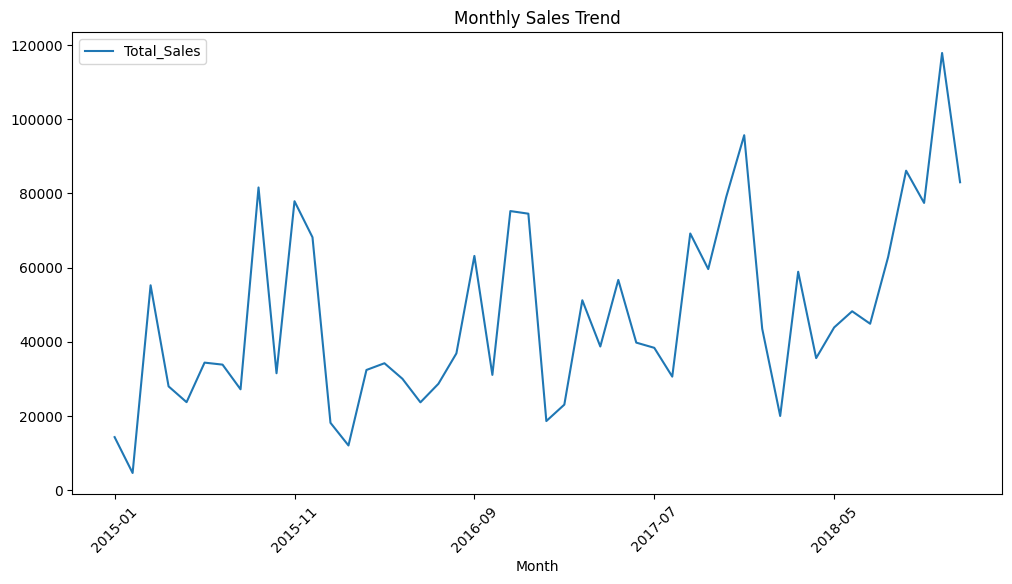

In [31]:
# 4.1 Monthly Sales Trend
monthly_sales.plot(x='Month', y='Total_Sales', kind='line', figsize=(12,6), title='Monthly Sales Trend')
plt.xticks(rotation=45)
plt.show()

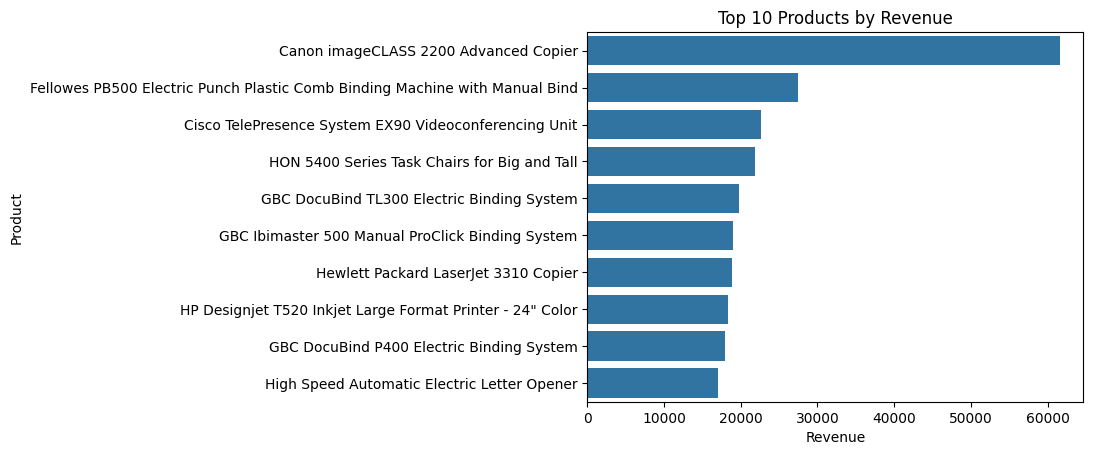

In [32]:
# 4.2 Top 10 Products by Revenue
sns.barplot(x='Revenue', y='Product', data=top_products)
plt.title('Top 10 Products by Revenue')
plt.show()

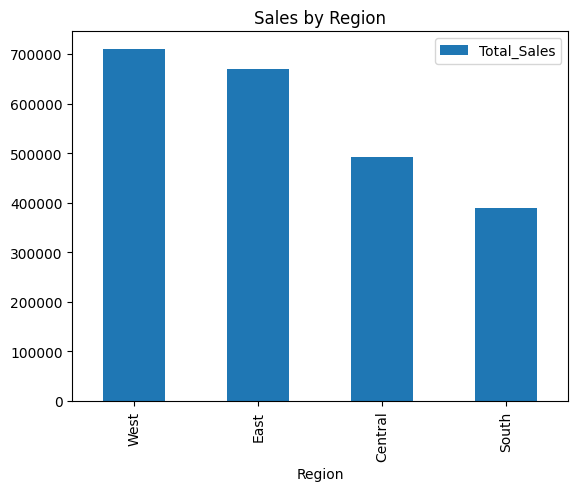

In [33]:
# 4.3 Sales by Region
region_sales.plot(x='Region', y='Total_Sales', kind='bar', title='Sales by Region')
plt.show()

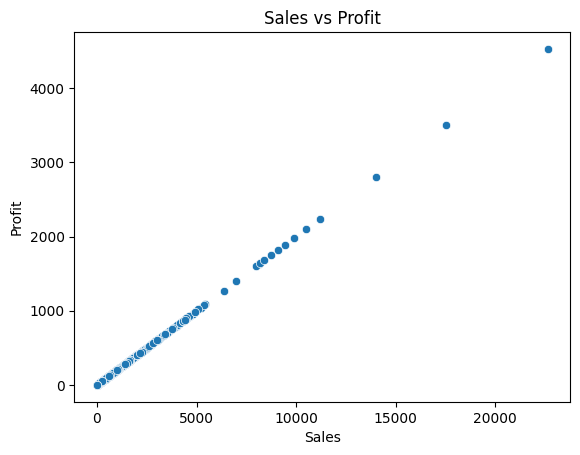

In [34]:
# 4.4 Scatter plot: Sales vs Profit
sns.scatterplot(x='Sales', y='Profit', data=data)
plt.title('Sales vs Profit')
plt.show()